<a href="https://colab.research.google.com/github/ProtikNag/Titanic-Machine-Learning-from-Disaster/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect with google drive

In [1]:
#Step 1 part 1: connect to drive
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110851 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

# Import libraries

In [0]:
import numpy as np 
import pandas as pd 

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

# Import data

In [0]:
data_root = 'drive/TitanicData/titanic/'
train_df = pd.read_csv('{}{}'.format(data_root,'train.csv'))
test_df = pd.read_csv('{}{}'.format(data_root,'test.csv'))

# Describe and visualise the data

In [182]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [183]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [184]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Approximately 39% of the passengers had survived.

In [185]:
train_df.shape

(891, 12)

In [186]:
print("Null: ", train_df.Age.isnull().sum(), "  Missing Data in percentage: ",train_df.Age.isnull().sum()/train_df.shape[0]*100)
print("Null: ", train_df.Sex.isnull().sum(), "  Missing Data in percentage: ",train_df.Sex.isnull().sum()/train_df.shape[0]*100)
print("Null: ", train_df.Cabin.isnull().sum(), "  Missing Data in percentage: ",train_df.Cabin.isnull().sum()/train_df.shape[0]*100)
print("Null: ", train_df.Fare.isnull().sum(), "  Missing Data in percentage: ",train_df.Fare.isnull().sum()/train_df.shape[0]*100)
print("Null: ", train_df.Pclass.isnull().sum(), "  Missing Data in percentage: ",train_df.Pclass.isnull().sum()/train_df.shape[0]*100)
print("Null: ", train_df.Embarked.isnull().sum(), "  Missing Data in percentage: ",train_df.Embarked.isnull().sum()/train_df.shape[0]*100)
print("Null: ", train_df.Survived.isnull().sum(), "  Missing Data in percentage: ",train_df.Survived.isnull().sum()/train_df.shape[0]*100)

Null:  177   Missing Data in percentage:  19.865319865319865
Null:  0   Missing Data in percentage:  0.0
Null:  687   Missing Data in percentage:  77.10437710437711
Null:  0   Missing Data in percentage:  0.0
Null:  0   Missing Data in percentage:  0.0
Null:  2   Missing Data in percentage:  0.22446689113355783
Null:  0   Missing Data in percentage:  0.0


In [187]:
men = train_df[train_df['Sex'] == 'male']
women = train_df[train_df['Sex'] == 'female']

print("Percentage of men survived: ", men.Survived.sum()/men.shape[0]*100)
print("Percentage of women survived: ", women.Survived.sum()/women.shape[0]*100)

Percentage of men survived:  18.890814558058924
Percentage of women survived:  74.20382165605095


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


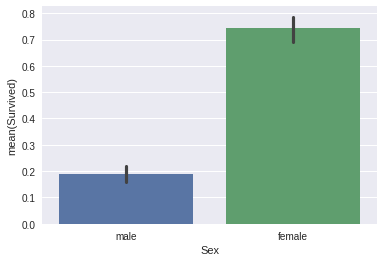

In [188]:
sns.barplot(x='Sex', y='Survived', data=train_df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


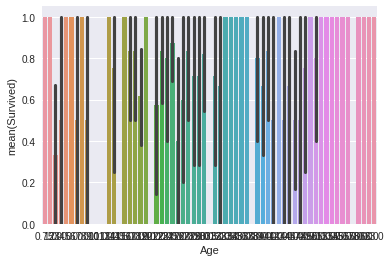

In [191]:
sns.barplot(x='Age', y='Survived', data=women)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


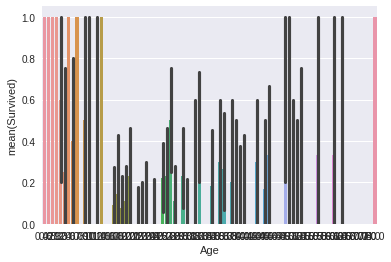

In [192]:

sns.barplot(x='Age', y='Survived', data=men)

This means age and sex should be considered as vital features. For children and women survival rate is high enough. 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


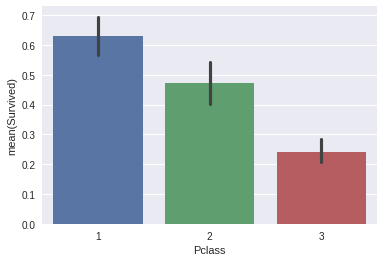

In [193]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

Here we see that first class passengers got more chance of survival than other classes. So, we mush consider Pclass as a feature. 

In [194]:
new_data = train_df[['Survived','SibSp','Parch']]
relatives = train_df['SibSp']+train_df['Parch']

new_data['Relatives'] = relatives

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [195]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Survived     891 non-null int64
SibSp        891 non-null int64
Parch        891 non-null int64
Relatives    891 non-null int64
dtypes: int64(4)
memory usage: 27.9 KB


In [196]:
new_data

,Survived,SibSp,Parch,Relatives
0,0,1,0,1
1,1,1,0,1
2,1,0,0,0
3,1,1,0,1
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,3,1,4
8,1,0,2,2
9,1,1,0,1


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


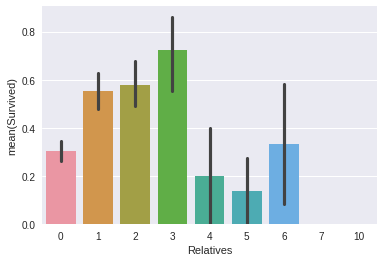

In [197]:
sns.barplot(x='Relatives', y='Survived', data=new_data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


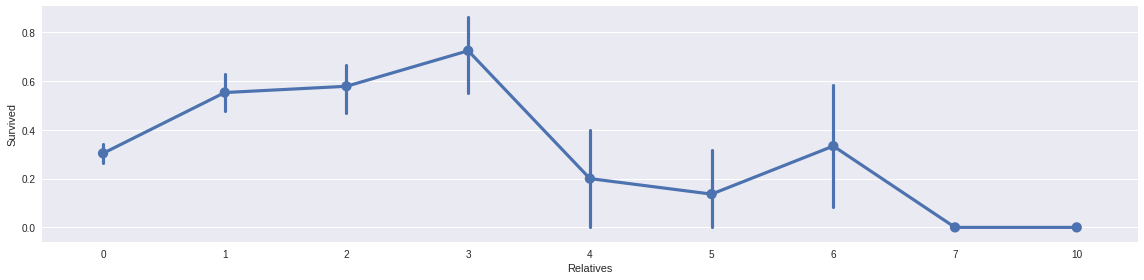

In [198]:
axes = sns.factorplot('Relatives','Survived', 
                      data=new_data, aspect = 4, )

This shows that if someone has 2 or 3 relatives with them, they had the most probabilities to survive the disaster. 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


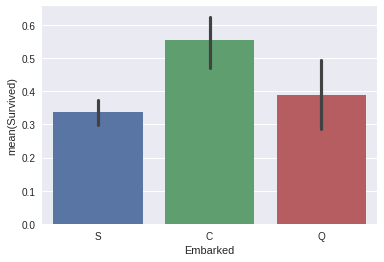

In [199]:
sns.barplot(x='Embarked', y='Survived', data=train_df)

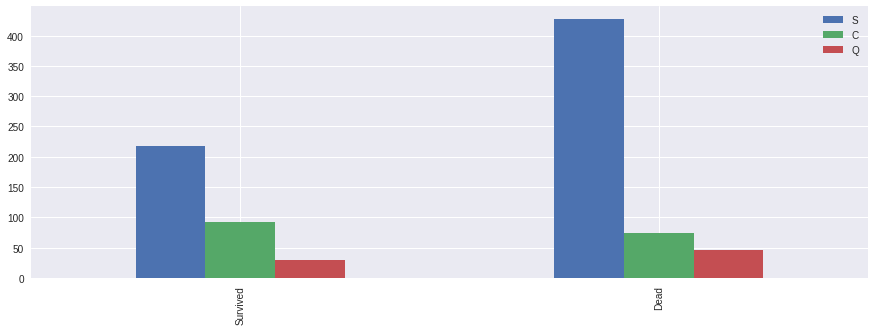

In [200]:
survived = train_df[train_df['Survived'] == 1]['Embarked'].value_counts()
dead = train_df[train_df['Survived'] == 0]['Embarked'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=False, figsize=(15,5))

Though there should be no relation between embarked place name and survival information but the graphs show that, actually there has a relation. I don't know how.

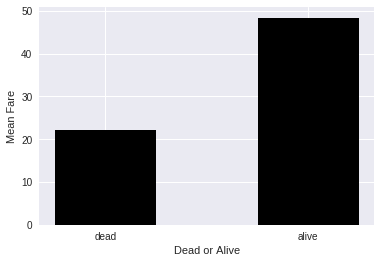

In [201]:
dead = train_df[train_df['Survived'] == 0]['Fare'].mean()
alive = train_df[train_df['Survived'] == 1]['Fare'].mean()

x_axis = ["dead","alive"]
y_axis = [dead,alive]

plt.bar(x_axis, y_axis, 0.5, color='black')
plt.xlabel('Dead or Alive')
plt.ylabel('Mean Fare')
plt.show()

Here we see that who paid higher fare had got better chance to survive. So fare is an important feature for designing a predictive model. 

# Deal with missing data

In [0]:
mean_age_train = train_df['Age'].mean()
mean_age_test = test_df['Age'].mean()
std_age_train = train_df['Age'].std() 
std_age_test = test_df['Age'].std()

lt = []
for data in train_df['Age']:
  if np.isnan(data):
    x = np.random.randint(mean_age_train-std_age_train, mean_age_train+std_age_train)
    lt.append(x)
  else:
    lt.append(data)
    
train_df['Age'] = lt

lt = []
for data in test_df['Age']:
  if np.isnan(data):
    x = np.random.randint(mean_age_test-std_age_test, mean_age_test+std_age_test)
    lt.append(x)
  else:
    lt.append(data)
    
test_df['Age'] = lt

Filled blank age cells with a random value between **(Mean-Standard Deviation)** and **(Mean+Standard Deviation)** 

In [0]:
fare_mean = test_df['Fare'].mean()

lt = []
for data in test_df['Fare']:
  if np.isnan(data):
    x = fare_mean
    lt.append(x)
  else:
    lt.append(data)
    
test_df['Fare'] = lt

In [0]:
val = 'S'
train_df['Embarked'] = train_df['Embarked'].fillna(val)

In [205]:
print(test_df['Fare'].isnull().sum())
print(train_df['Fare'].isnull().sum())

print(test_df['Age'].isnull().sum())
print(train_df['Age'].isnull().sum())

print(test_df['Pclass'].isnull().sum())
print(train_df['Pclass'].isnull().sum())

print(test_df['Embarked'].isnull().sum())
print(train_df['Embarked'].isnull().sum())

print(test_df['Sex'].isnull().sum())
print(train_df['Sex'].isnull().sum())

0
0
0
0
0
0
0
0
0
0


**No more null values** remain in Train and Test data.

In [0]:
def wrangle(data):
  
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1}).astype(int)
    
    new_embarked = pd.get_dummies(data['Embarked'], prefix='Embarked')
    data = pd.concat([data, new_embarked], axis=1)
    return data.drop('Embarked', axis=1)
  
train_df = wrangle(train_df)
test_df = wrangle(test_df)

In [209]:
print(train_df.head())
print(test_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN           0           0           1  
1          PC 17599  71.2833   C85           1           0           0  
2  STON/O2. 3101282   7.9250   NaN           0           0           1  
3   

In [210]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes: float64(2), int64(6), object(3), uint8(3)
memory usage: 79.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non

# Training and Evaluation with different machine learning models

In [0]:
X_train = train_df.drop("Survived", axis=1)
X_train = X_train.drop("PassengerId", axis=1)
X_train = X_train.drop("SibSp", axis=1)
X_train = X_train.drop("Parch", axis=1)
X_train = X_train.drop("Ticket", axis=1)
X_train = X_train.drop("Cabin", axis=1)
X_train = X_train.drop("Name", axis=1)
Y_train = train_df["Survived"]


In [0]:
X_test = test_df
X_test = X_test.drop("PassengerId", axis=1)
X_test = X_test.drop("SibSp", axis=1)
X_test = X_test.drop("Parch", axis=1)
X_test = X_test.drop("Ticket", axis=1)
X_test = X_test.drop("Cabin", axis=1)
X_test = X_test.drop("Name", axis=1)

In [224]:
X_test.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null float64
Fare          418 non-null float64
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(2), int64(2), uint8(3)
memory usage: 14.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(2), uint8(3)
memory usage: 30.5 KB


## Random Forest

In [226]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
train_accuracy = round(random_forest.score(X_train, Y_train) * 100, 2)
Y_predR = random_forest.predict(X_test)
print(train_accuracy)

98.65


## K Nearest Neighbours

In [227]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
train_accuracy = round(knn.score(X_train, Y_train) * 100, 2)
Y_predK = knn.predict(X_test)
print(train_accuracy)

80.36


## Support Vector Machine

In [228]:
svc = SVC()
svc.fit(X_train, Y_train)
train_accuracy = round(svc.score(X_train, Y_train) * 100, 2)
Y_predS = svc.predict(X_test)
print(train_accuracy)

89.67


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Logistic Regression

In [229]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, Y_train)
train_accuracy = round(model_logistic.score(X_train, Y_train) * 100, 2)
Y_predL = model_logistic.predict(X_test)
print(train_accuracy)

79.35


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Create CSV

In [0]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_predR
    })
submission.to_csv('{}{}'.format(data_root,'submission.csv'), index=False)